In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False

## 数值积分-integrate

### 球的体积

In [2]:
import numpy as np

def half_circle(x):
    """
    定义半圆形的函数
    
    参数：
    x: 输入的自变量
    
    返回值：
    半圆形函数对应自变量 x 的函数值
    """
    return (1 - x**2) ** 0.5

N = 10000
x = np.linspace(-1, 1, N)  # 在区间 [-1, 1] 上均匀生成 N 个点作为自变量 x
dx = x[1] - x[0]  # 计算自变量 x 的步长
y = half_circle(x)  # 根据自变量 x 计算对应的函数值
area = 2 * dx * np.sum(y)  # 计算半圆形曲线下的面积（面积的两倍，相当于定积分的结果）

# 导入了 numpy 库。

# 定义了一个函数 half_circle，该函数用于计算半圆形曲线在给定自变量 x 处的函数值。

# 设定了变量 N 的值为 10000，表示在区间 [-1, 1] 上均匀生成 10000 个点。

# 使用 np.linspace(-1, 1, N) 生成了一个长度为 N 的数组 x，其中包含了从 -1 到 1 的 N 个等间距的点作为自变量。

# 通过 x[1] - x[0] 计算自变量 x 的步长，并将结果保存在变量 dx 中。

# 使用 half_circle(x) 计算了半圆形曲线在自变量 x 上的函数值，并将结果保存在变量 y 中。

# 通过 2 * dx * np.sum(y) 计算了半圆形曲线下的面积，相当于对半圆形曲线进行定积分。

# 输出结果为计算得到的面积的两倍，即 area。
area


3.1415893269307373

In [3]:
np.trapz(y, x) * 2 # 面积的两倍
# np.trapz(y, x) 是一个 NumPy 函数，用于计算给定自变量 x 和函数值 y 形成的曲线下的面积。
# 将其乘以 2 表示计算该曲线下的面积后再乘以 2，得到的结果就是该曲线下的面积的两倍，即 2 * np.trapz(y, x)。

# 在给定自变量 x 和函数值 y 的情况下，使用 np.trapz(y, x) 可以对这些数据点形成的曲线进行积分（使用梯形法则），从而计算曲线下的面积。
# 通过乘以 2，可以得到曲线下的面积的两倍。这在通常的数学应用中可以表示某个特定区域或图形的双倍面积，比如这里的半圆形的面积。

# 因此，np.trapz(y, x) * 2 表示对曲线（在这个例子中是半圆形曲线）下的面积进行计算，然后将结果乘以 2，得到的值即为该曲线下的面积的两倍。

3.1415893269315975

In [4]:
from scipy import integrate

pi_half, err = integrate.quad(half_circle, -1, 1)
# 使用 scipy 的 integrate.quad() 函数对 half_circle 函数在区间 [-1, 1] 上进行数值积分
# 返回值 pi_half 为积分的结果，err 为估计的误差

pi_half * 2
# 将积分结果 pi_half 乘以 2，得到半圆形的面积的两倍


3.1415926535897967

In [5]:
def half_sphere(x, y):
    """
    定义半球面的函数
    
    参数：
    x: 自变量 x
    y: 自变量 y
    
    返回值：
    半球面函数对于给定自变量 x, y 的函数值
    """
    return (1 - x**2 - y**2)**0.5

volume, error = integrate.dblquad(half_sphere, -1, 1, lambda x: -half_circle(x), lambda x: half_circle(x))
# 使用 scipy 的 integrate.dblquad() 函数对 half_sphere 函数在区域 [-1, 1] × [-half_circle(x), half_circle(x)]
# 下的曲面进行二重积分计算
# 返回值 volume 为积分结果，error 为积分结果的误差估计

print(volume, error, np.pi*4/3/2)
# 分别打印积分结果 volume、误差估计 error，以及真实值 np.pi*4/3/2（球的体积公式）

# 定义了一个函数 half_sphere，该函数用于计算半球面的函数值，接受两个参数 x 和 y。

# volume, error = integrate.dblquad(half_sphere, -1, 1, lambda x: -half_circle(x), lambda x: half_circle(x)) 使用 integrate.dblquad() 对 half_sphere 函数在区域 [-1, 1] × [-half_circle(x), half_circle(x)] 下的曲面进行二重积分计算。lambda x: -half_circle(x) 和 lambda x: half_circle(x) 分别定义了积分区域的上下边界。

# 将积分结果保存在变量 volume 和 error 中，分别表示积分结果和积分结果的误差估计。

# print(volume, error, np.pi*4/3/2) 分别打印积分结果 volume、误差估计 error，以及真实值 np.pi*4/3/2（球的体积公式）进行对比。


2.0943951023931984 1.0002354500215915e-09 2.0943951023931953


### 解常微分方程组

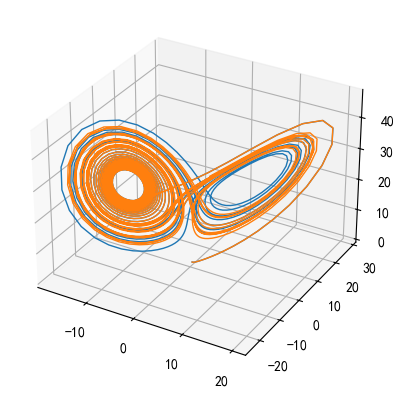

In [6]:
from scipy.integrate import odeint 
import numpy as np 
import matplotlib.pyplot as plt

def lorenz(w, t, p, r, b):
    """
    洛伦茨吸引子的微分方程组
    
    参数：
    w: 状态变量，[x, y, z]
    t: 时间变量
    p, r, b: 控制参数
    
    返回值：
    dx/dt, dy/dt, dz/dt的值
    """
    x, y, z = w.tolist()
    return p*(y-x), x*(r-z)-y, x*y-b*z

t = np.arange(0, 30, 0.02)

track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(track1[:,0], track1[:,1], track1[:,2], lw=1)
ax.plot(track2[:,0], track2[:,1], track2[:,2], lw=1)
plt.show()
# lorenz(w, t, p, r, b) 定义了洛伦茨吸引子的微分方程组，其中 w 是状态变量，t 是时间变量，p, r, b 是控制参数。函数返回 dx/dt, dy/dt, dz/dt 的值。

# 使用 np.arange() 创建时间点 t，从 0 开始，步长为 0.02。

# 使用 odeint 函数对洛伦茨吸引子的微分方程进行求解。分别使用两个不同的初始值 (0.0, 1.00, 0.0) 和 (0.0, 1.01, 0.0)，参数设置为 (10.0, 28.0, 3.0)。

# 创建一个 3D 图形进行绘制。

# 使用 ax.plot() 在 3D 图形上分别绘制 track1 和 track2 的轨迹。

# 使用 plt.show() 显示图形。

### ode类

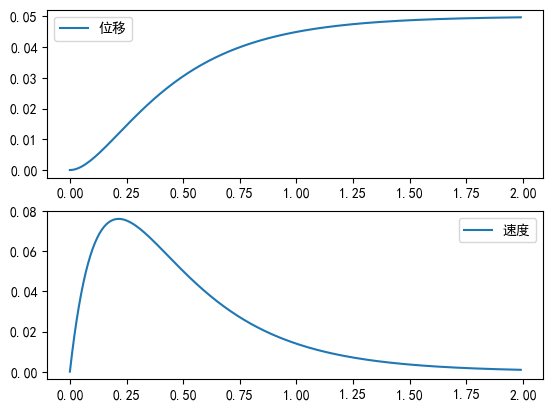

In [7]:
def mass_spring_damper(xu, t, m, k, b, F):
    """
    质量弹簧阻尼系统的微分方程
    
    参数：
    xu: 状态变量，[x, u]，x为位移，u为速度
    t: 时间变量
    m, k, b, F: 质量、弹簧刚度、阻尼系数和外力
    
    返回值：
    dx/dt（位移变化率）和du/dt（速度变化率）的值
    """
    x, u = xu.tolist()
    dx = u
    du = (F - k*x - b*u)/m
    return dx, du

m, b, k, F = 1.0, 10.0, 20.0, 1.0
init_status = 0.0, 0.0
args = m, k, b, F
t = np.arange(0, 2, 0.01)
result = odeint(mass_spring_damper, init_status, t, args)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, result[:, 0], label="位移")
ax1.legend()
ax2.plot(t, result[:, 1], label="速度")
ax2.legend()
# mass_spring_damper(xu, t, m, k, b, F) 定义了质量弹簧阻尼系统的微分方程，其中 xu 是状态变量，位移为 x，速度为 u，t 是时间变量，m, k, b, F 是质量、弹簧刚度、阻尼系数和外力。函数返回 dx/dt（位移变化率）和 du/dt（速度变化率）的值。

# 设定质量、阻尼系数、弹簧刚度和外力的值为 1.0, 10.0, 20.0, 1.0。

# 设定初始状态为位移和速度均为 0.0，将参数保存在 args 中。

# 使用 np.arange() 创建时间点 t，从 0 开始，步长为 0.01。

# 使用 odeint 函数对质量弹簧阻尼系统的微分方程进行求解，传入初始状态、时间点和参数。

# 创建一个包含两个子图的图形。

# 在第一个子图 ax1 上绘制时间变量 t 和位移 result[:,0] 的曲线，并添加 位移 的图例。

# 在第二个子图 ax2 上绘制时间变量 t 和速度 result[:,1] 的曲线，并添加 速度 的图例。

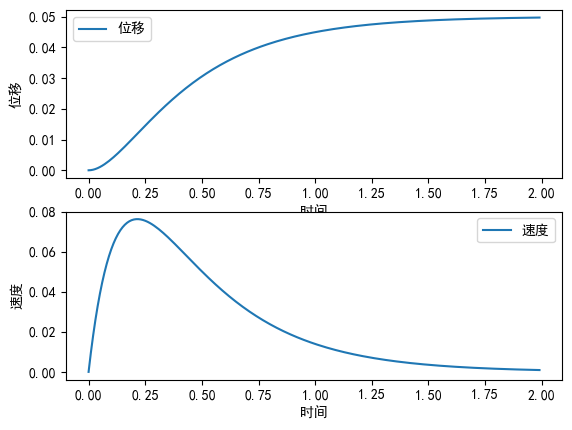

In [8]:
def mass_spring_damper(xu, t, m, k, b, F):
    """
    质量弹簧阻尼系统的微分方程
    
    参数：
    xu: 状态变量，[x, u]，x为位移，u为速度
    t: 时间变量
    m, k, b, F: 质量、弹簧刚度、阻尼系数和外力
    
    返回值：
    dx/dt（位移变化率）和du/dt（速度变化率）的值
    """
    x, u = xu.tolist()
    dx = u
    du = (F - k*x - b*u)/m
    return dx, du

m, b, k, F = 1.0, 10.0, 20.0, 1.0
init_status = 0.0, 0.0
args = m, k, b, F
t = np.arange(0, 2, 0.01)
result = odeint(mass_spring_damper, init_status, t, args)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, result[:, 0], label="位移")
ax1.legend()
ax1.set_xlabel("时间")
ax1.set_ylabel("位移")
ax2.plot(t, result[:, 1], label="速度")
ax2.legend()
ax2.set_xlabel("时间")
ax2.set_ylabel("速度")

plt.show()

# mass_spring_damper(xu, t, m, k, b, F) 定义了质量弹簧阻尼系统的微分方程，其中 xu 是状态变量，位移为 x，速度为 u，t 是时间变量，m, k, b, F 是质量、弹簧刚度、阻尼系数和外力。函数返回 dx/dt（位移变化率）和 du/dt（速度变化率）的值。

# 设定了质量、阻尼系数、弹簧刚度和外力的值为 1.0, 10.0, 20.0, 1.0。

# 设定初始状态为位移和速度均为 0.0，将参数保存在 args 中。

# 使用 np.arange() 创建时间点 t，从 0 开始，步长为 0.01。

# 使用 odeint 函数对质量弹簧阻尼系统的微分方程进行求解，传入初始状态、时间点和参数。

# 创建一个包含两个子图的图形。

# 在第一个子图 ax1 上绘制时间变量 t 和位移 result[:,0] 的曲线，并添加 位移 的图例。

# 设定第一个子图 x 轴标签为 "时间"，y 轴标签为 "位移"。

# 在第二个子图 ax2 上绘制时间变量 t 和速度 result[:,1] 的曲线，并添加 速度 的图例。

# 设定第二个子图 x 轴标签为 "时间"，y 轴标签为 "速度"。

# 使用 plt.show() 显示图形。


In [9]:
from scipy.integrate import ode

class MassSpringDamper(object):
    """
    质量弹簧阻尼系统的类
    
    参数：
    m, k, b, F: 质量、弹簧刚度、阻尼系数和外力
    
    方法：
    f(t, xu): 计算微分方程的右侧
    
    """
    
    def __init__(self, m, k, b, F):
        self.m, self.k, self.b, self.F = m, k, b, F
        
    def f(self, t, xu):
        """
        计算微分方程的右侧
        
        参数：
        t: 时间变量
        xu: 状态变量，[x, u]，x为位移，u为速度
        
        返回值：
        dx/dt（位移变化率）和du/dt（速度变化率）的值
        """
        x, u = xu.tolist()
        dx = u
        du = (self.F - self.k*x - self.b*u)/self.m
        return [dx, du] 

system = MassSpringDamper(m=m, k=k, b=b, F=F)
init_status = 0.0, 0.0
dt = 0.01

r = ode(system.f)
r.set_integrator('vode', method='bdf')
r.set_initial_value(init_status, 0)

t = []
result2 = [init_status]
while r.successful() and r.t + dt < 2:
    r.integrate(r.t + dt)
    t.append(r.t)
    result2.append(r.y)
    
result2 = np.array(result2)
np.allclose(result, result2)

# 定义了一个名为 MassSpringDamper 的类，用于表示质量弹簧阻尼系统。

# 类的构造函数 __init__(self, m, k, b, F) 接受质量 m、弹簧刚度 k、阻尼系数 b 和外力 F 作为参数，将其保存在对象的属性中。

# 类的方法 f(self, t, xu) 用于计算微分方程的右侧，其中 t 是时间变量，xu 是状态变量，位移为 x，速度为 u。方法返回 dx/dt（位移变化率）和 du/dt（速度变化率）的值。

# 创建了一个 MassSpringDamper 的对象 system，并传入质量、弹簧刚度、阻尼系数和外_


True

In [10]:
class PID(object):
    """
    PID控制器的类
    
    参数：
    kp, ki, kd: P、I、D参数
    dt: 控制的时间步长
    
    属性：
    kp, ki, kd: P、I、D参数
    dt: 控制的时间步长
    last_error: 上一次的误差
    status: 控制输出
    
    方法：
    update(error): 根据当前误差更新控制器状态并计算输出
    
    """
    
    def __init__(self, kp, ki, kd, dt):
        self.kp, self.ki, self.kd, self.dt = kp, ki, kd, dt
        self.last_error = None
        self.status = 0.0
        
    def update(self, error):
        """
        根据当前误差更新控制器状态并计算输出
        
        参数：
        error: 当前误差
        
        返回值：
        控制输出
        
        """
        p = self.kp * error
        i = self.ki * self.status
        if self.last_error is None:
            d = 0.0
        else:
            d = self.kd * (error - self.last_error) / self.dt
        self.status += error * self.dt
        self.last_error = error
        return p + i + d
# 定义了一个名为 PID 的类，用于表示 PID 控制器。

# 类的构造函数 __init__(self, kp, ki, kd, dt) 接受 P、I、D 参数 kp, ki, kd 和控制的时间步长 dt 作为参数，将其保存在对象的属性中。同时初始化上一次的误差 last_error 为 None，控制输出 status 为 0.0。

# 类的方法 update(self, error) 用于根据当前误差更新控制器状态并计算输出。其中，error 为当前误差。

# 在方法中，根据当前误差和 P、I、D 参数计算比例项 p、积分项 i 和微分项 d。

# 如果是首次调用该方法，设置微分项 d 为 0.0，表示此时没有上一次的误差。

# 更新积分项 i，将当前误差乘以时间步长 dt 累加到控制输出 status 上。

# 将当前误差设置为上一次的误差。

# 最后，返回控制输出 p + i + d。

控制力的终值: 19.943404707069572


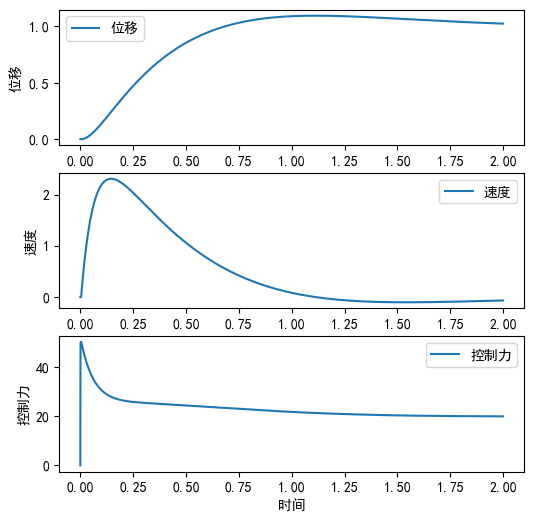

In [11]:
def pid_control_system(kp, ki, kd, dt, target=1.0):
    """
    PID控制系统的函数
    
    参数：
    kp, ki, kd: P、I、D参数
    dt: 控制的时间步长
    target: 目标位移，默认为1.0
    
    返回值：
    t: 时间数组
    F_arr: 控制力数组
    result: 位移和速度数组
    
    """
    system = MassSpringDamper(m=m, k=k, b=b, F=0.0)
    pid = PID(kp, ki, kd, dt)
    init_status = 0.0, 0.0

    r = ode(system.f)
    r.set_integrator('vode', method='bdf')
    r.set_initial_value(init_status, 0)

    t = [0]
    result = [init_status]
    F_arr = [0]

    while r.successful() and r.t + dt < 2.0:
        r.integrate(r.t + dt)
        err = target - r.y[0]  # 计算误差❶
        F = pid.update(err)  # 更新控制器并计算控制力❷
        system.F = F  # 将控制力设置为系统的外力❸
        t.append(r.t)
        result.append(r.y)
        F_arr.append(F)

    result = np.array(result)
    t = np.array(t)
    F_arr = np.array(F_arr)
    return t, F_arr, result


t, F_arr, result = pid_control_system(50.0, 100.0, 10.0, 0.001)
print(u"控制力的终值:", F_arr[-1])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 6))
ax1.plot(t, result[:, 0], label="位移")
ax1.legend(loc="best")
ax1.set_ylabel("位移")
ax2.plot(t, result[:, 1], label="速度")
ax2.legend(loc="best")
ax2.set_ylabel("速度")
ax3.plot(t, F_arr, label="控制力")
ax3.legend(loc="best")
ax3.set_xlabel("时间")
ax3.set_ylabel("控制力")

plt.show()
# pid_control_system(kp, ki, kd, dt, target=1.0) 是一个函数，用于模拟 PID 控制系统。

# 创建 MassSpringDamper 对象 system 和 PID 对象 pid，并传入相应的参数。

# 设定初始状态为 0.0, 0.0，控制时间步长为 dt。

# 创建 ode 对象 r，并通过 r.set_integrator() 方法设置求解器为 ‘vode’ 求解器，使用 ‘bdf’ 方法进行积分。

# 初始化时间数组 t、位移和速度数组 result、控制力数组 F_arr。

# 迭代求解微分方程，直到时间超过2秒或求解失败。

# 在每次迭代中，计算误差 err，即目标位移减去当前系统的位移。

# 使用 PID 控制器的 update() 方法根据误差来更新控制器状态，并计算控制力。

# 将控制力设置为质量弹簧阻尼系统的外力。

# 将时间、位移_

In [12]:
%%time
from scipy import optimize


def eval_func(k):
    kp, ki, kd = k
    t, F_arr, result = pid_control_system(kp, ki, kd, 0.01)
    return np.sum(np.abs(result[:, 0] - 1.0))

kwargs = {
    "method": "L-BFGS-B",
    "bounds": [(10, 200), (10, 100), (1, 100)],
    "options": {
        "approx_grad": True
    }
}

opt_k = optimize.basinhopping(
    eval_func, (10, 10, 10), niter=10, minimizer_kwargs=kwargs)
print("优化结果:", opt_k.x)
# 使用 %%time 命令测量代码的运行时间。

# 定义了一个函数 eval_func(k)，用于计算评估函数值。函数接受 P、I、D 参数 kp, ki, kd 作为参数，调用 pid_control_system 函数，返回位移误差和 1.0 的绝对值之和。

# 定义 kwargs 字典，用于定义优化器的参数。其中，method 设置为 "L-BFGS-B"，bounds 设置为 P、I、D 参数的取值范围，options 设置为 approx_grad 为 True，以使用近似梯度。

# 使用 optimize.basinhopping 函数进行全局优化。传入评估函数 eval_func，初始值 (10, 10, 10)，niter 设置为 10，minimizer_kwargs 设置为优化器的参数。

# 打印优化结果的 P、I、D 参数值 opt_k.x。

d:\py11\Lib\site-packages\scipy\optimize\_basinhopping.py:303: OptimizeWarning: Unknown solver options: approx_grad
  return self.minimizer(self.func, x0, **self.kwargs)


优化结果: [26.95682091 97.93762364  1.37261777]
CPU times: total: 7.11 s
Wall time: 18.6 s


In [13]:
%%time
from scipy import optimize


def eval_func(k):
    kp, ki, kd = k
    t, F_arr, result = pid_control_system(kp, ki, kd, 0.01)
    return np.sum(np.abs(result[:, 0] - 1.0))


kwargs = {
    "method": "L-BFGS-B",
    "bounds": [(10, 200), (10, 100), (1, 100)],
    "options": {
        "approx_grad": True
    }
}

opt_k = optimize.basinhopping(
    eval_func, (10, 10, 10), niter=10, minimizer_kwargs=kwargs)
print(opt_k.x)

[69.76816867 82.7917394   2.21621271]
CPU times: total: 6.97 s
Wall time: 14.6 s


t = 0.5000000000000002, x = 1.02421, u = -0.0144376


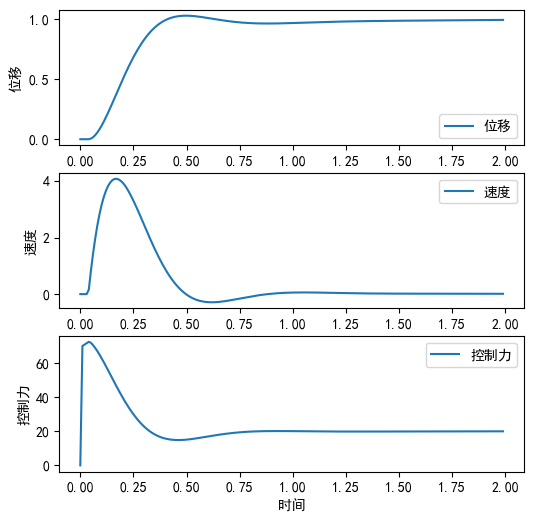

In [14]:
#%fig=优化PID的参数降低控制响应时间
kp, ki, kd = opt_k.x
t, F_arr, result = pid_control_system(kp, ki, kd, 0.01)
idx = np.argmin(np.abs(t - 0.5))
x, u = result[idx]
print("t = {}, x = {:g}, u = {:g}".format(t[idx], x, u))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 6))
ax1.plot(t, result[:, 0], label="位移")
ax1.legend(loc="best")
ax1.set_ylabel("位移")
ax2.plot(t, result[:, 1], label="速度")
ax2.legend(loc="best")
ax2.set_ylabel("速度")
ax3.plot(t, F_arr, label="控制力")
ax3.legend(loc="best")
ax3.set_xlabel("时间")
ax3.set_ylabel("控制力")

plt.show()
